# Logistic Regression using sklearn

This is a baseline logistic regression classifier. This classifier has an accuracy score of 0.9722.

Data can be found at https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge.

In [36]:
# importing required files

import numpy as np
import pandas as pd
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import seaborn as sns

import re

from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [38]:
train_df = pd.read_csv('/Users/sklan/PyAiProjects/TCC/train-2.csv')
test_df = pd.read_csv('/Users/sklan/PyAiProjects/TCC/test-2.csv')

In [39]:
train_df.describe(include='all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,b97aa69dd68106f0,Thanks. I like this one because it is similar ...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Checking to see if there are any NaN values in the dataset.

In [40]:
print(pd.isnull(train_df).sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


## Plotting

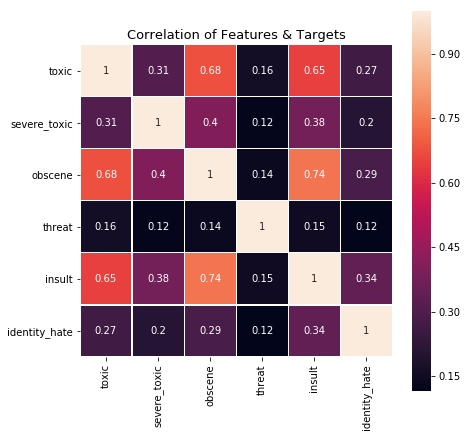

In [41]:
plt.figure(figsize=(7,7))
plt.title('Correlation of Features & Targets',y=1,size=13)
sns.heatmap(train_df[target_columns].astype(float).corr(),linewidths=0.2,vmax=1.0,square=True,annot=True)
plt.show()

Some random samples from the dataset.

In [42]:
train_df['comment_text'][3]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [43]:
train_df['comment_text'][8]

"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169"

Simply removing special characters and replacing words can improve performance of the classifier.

In [44]:
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('\'ll', ' will'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('\'ve', ' have'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('don\'t', ' do not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('dont', ' do not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('aren\'t', ' are not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('won\'t', ' will not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('wont', ' will not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('can\'t', ' cannot'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('cant', ' cannot'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('shan\'t', ' shall not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('shant', ' shall not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('\'m', ' am'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("doesn't", "does not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("doesnt", "does not"))                                                      
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "didn't", "did not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "didnt", "did not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("hasn't", "has not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("hasnt", "has not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("haven't", "have not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("havent", "have not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("wouldn't", "would not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "didn't", "did not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "didnt", "did not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("it's" , "it is"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "that's" , "that is"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("weren't" , "were not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("werent" , "were not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace(' u ', ' you '))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace(' U ', ' you '))

In [45]:
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('\'ll', ' will'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('\'ve', ' have'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('don\'t', ' do not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('dont', ' do not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('aren\'t', ' are not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('won\'t', ' will not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('wont', ' will not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('can\'t', ' cannot'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('cant', ' cannot'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('shan\'t', ' shall not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('shant', ' shall not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('\'m', ' am'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("doesn't", "does not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("doesnt", "does not"))                                                      
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "didn't", "did not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "didnt", "did not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("hasn't", "has not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("hasnt", "has not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("haven't", "have not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("havent", "have not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("wouldn't", "would not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "didn't", "did not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "didnt", "did not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("it's" , "it is"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "that's" , "that is"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("weren't" , "were not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("werent" , "were not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace(' u ', ' you '))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace(' U ', ' you '))

In [46]:
# Removing special characters using regular expression
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: re.sub('[\(\)\"\t_\n.,:=!@#$%^&*-/[\]?|1234567890—]', ' ', x).strip())
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: re.sub('[\(\)\"\t_\n.,:=!@#$%^&*-/[\]?|1234567890—]', ' ', x).strip())

Creating a TFIDF matrix from text using sklearn

In [47]:
vectorizer = TfidfVectorizer(max_df=0.87,
               smooth_idf=1, max_features=300000)

In [48]:
X =  vectorizer.fit_transform(train_df['comment_text'])
X_ = vectorizer.transform(test_df['comment_text'])
Y = train_df[target_columns]

In [49]:
print(X.shape, X_.shape, Y.shape, test_df.shape)

(159571, 172600) (153164, 172600) (159571, 6) (153164, 2)


In [50]:
from sklearn.linear_model import LogisticRegression
submission = test_df['id']
logreg = LogisticRegression(C=12, max_iter=10000, dual=True)
submission = pd.DataFrame.from_dict({'id': test_df['id']})
for i in target_columns:
    logreg.fit(X, Y[i])
    submission.loc[:,i] = logreg.predict_proba(X_)[:,1]
    print(i)

toxic
severe_toxic
obscene
threat
insult
identity_hate


In [51]:
submission.to_csv('test_submissionp.csv', index=False)

In [52]:
submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999969,0.144886,0.999860,0.070646,0.974521,0.353210
1,0000247867823ef7,0.001040,0.000360,0.000285,0.000042,0.001706,0.000854
2,00013b17ad220c46,0.012821,0.001368,0.005027,0.000329,0.006693,0.001488
3,00017563c3f7919a,0.000481,0.001672,0.000691,0.000172,0.002124,0.000076
4,00017695ad8997eb,0.002322,0.000993,0.001509,0.000370,0.001883,0.000589
5,0001ea8717f6de06,0.003130,0.000155,0.001170,0.000280,0.005326,0.000540
6,00024115d4cbde0f,0.000223,0.000102,0.000476,0.000050,0.000744,0.000133
7,000247e83dcc1211,0.603275,0.000874,0.023654,0.000695,0.049811,0.000707
8,00025358d4737918,0.002573,0.000479,0.001494,0.000130,0.001210,0.000880
9,00026d1092fe71cc,0.001007,0.000116,0.001080,0.000067,0.005114,0.000348
